In [7]:
import json

coco_path = "coco/annotations/instances_train2017.json"
FLIR_path = "FLIR/train/Annotations/FLIR_08862.json"
coco_dict = {}
FLIR_dict = {}

with open(coco_path) as json_data:
    coco_dict = json.load(json_data)

with open(FLIR_path) as json_data:
    FLIR_dict = json.load(json_data)

    

# Test COCO


In [18]:
for key in coco_dict:
    print(key)
print(coco_dict["info"])
print("="*100)
print(coco_dict["licenses"])
print("="*100)
print(coco_dict["images"][:3])
print("="*100)
print(coco_dict["annotations"][:3])
print("="*100)
print(coco_dict["categories"][:10])


info
licenses
images
annotations
categories
{'description': 'COCO 2017 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2017, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'}
[{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/', 'id': 1, 'name': 'Attribution-NonCommercial-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nc/2.0/', 'id': 2, 'name': 'Attribution-NonCommercial License'}, {'url': 'http://creativecommons.org/licenses/by-nc-nd/2.0/', 'id': 3, 'name': 'Attribution-NonCommercial-NoDerivs License'}, {'url': 'http://creativecommons.org/licenses/by/2.0/', 'id': 4, 'name': 'Attribution License'}, {'url': 'http://creativecommons.org/licenses/by-sa/2.0/', 'id': 5, 'name': 'Attribution-ShareAlike License'}, {'url': 'http://creativecommons.org/licenses/by-nd/2.0/', 'id': 6, 'name': 'Attribution-NoDerivs License'}, {'url': 'http://flickr.com/commons/usage/', 'id': 7, 'name': 'No known copyright restrictions'}, {'url': 'http

## coco["info"]

![image](https://user-images.githubusercontent.com/12128784/81832493-8731f100-9579-11ea-8cb0-172ecfe3787f.png)

## coco["licenses"]

![image](https://user-images.githubusercontent.com/12128784/81832578-a761b000-9579-11ea-8908-1b5118856c87.png)

## coco["images"][:3]

![image](https://user-images.githubusercontent.com/12128784/81833001-222acb00-957a-11ea-9a10-b6bec8e648e8.png)

## coco["annotations"][0]

![image](https://user-images.githubusercontent.com/12128784/81832679-c19b8e00-9579-11ea-8ad5-8fd9f0286272.png)

## coco["annotations"][:3]

![image](https://user-images.githubusercontent.com/12128784/81833204-64540c80-957a-11ea-8c78-076b0bf6fc64.png)

## coco["categories"][:10]

![image](https://user-images.githubusercontent.com/12128784/81832754-d710b800-9579-11ea-8195-407f3310e03a.png)


In [9]:
print(FLIR_dict)

{'annotation': [{'area': 12870, 'bbox': [5, 246, 143, 90], 'category_id': '3', 'id': 1, 'image_id': 8862, 'iscrowd': 0, 'segmentation': [[5, 246, 5, 336, 148, 336, 148, 246]]}, {'area': 288, 'bbox': [288, 221, 18, 16], 'category_id': '3', 'id': 2, 'image_id': 8862, 'iscrowd': 0, 'segmentation': [[288, 221, 288, 237, 306, 237, 306, 221]]}, {'area': 1020, 'bbox': [335, 225, 34, 30], 'category_id': '3', 'id': 3, 'image_id': 8862, 'iscrowd': 0, 'segmentation': [[335, 225, 335, 255, 369, 255, 369, 225]]}, {'area': 357, 'bbox': [326, 226, 17, 21], 'category_id': '3', 'id': 4, 'image_id': 8862, 'iscrowd': 0, 'segmentation': [[326, 226, 326, 247, 343, 247, 343, 226]]}, {'area': 560, 'bbox': [29, 234, 14, 40], 'category_id': '1', 'id': 5, 'image_id': 8862, 'iscrowd': 0, 'segmentation': [[29, 234, 29, 274, 43, 274, 43, 234]]}, {'area': 630, 'bbox': [38, 234, 21, 30], 'category_id': '1', 'id': 6, 'image_id': 8862, 'iscrowd': 0, 'segmentation': [[38, 234, 38, 264, 59, 264, 59, 234]]}, {'area': 378

## FLIR
![image](https://user-images.githubusercontent.com/12128784/81832021-fb1fc980-9578-11ea-8771-45d35db1f985.png)

# coco check


In [87]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

dir = "coco/images/train2017/"
file_name = coco_dict["images"][0]["file_name"]
print(file_name)
print(coco_dict["images"][0]["id"])
img = mpimg.imread(dir + file_name)



000000391895.jpg
391895


In [113]:
seg = []

for an in coco_dict["annotations"]:
    if an["image_id"] == 391895:
        seg.append(an["segmentation"][0])
#        print(an["segmentation"])


In [89]:
import numpy as np

X = []
Y = []

for j in range(len(seg)):
    X.append([seg[j][i] for i in range(0,len(seg[j]),2)])
    Y.append([seg[j][i] for i in range(1,len(seg[j]),2)])


000000391895.jpg
391895


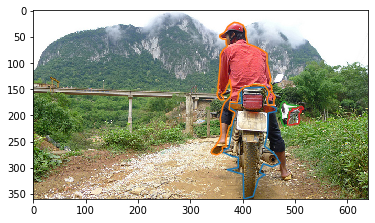

In [90]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

dir = "coco/images/train2017/"
file_name = coco_dict["images"][0]["file_name"]

print(file_name)
print(coco_dict["images"][0]["id"])
img = mpimg.imread(dir + file_name)

for x,y in zip(X,Y):
    plt.plot(x,y)
plt.imshow(img)


위 그림을 보아 annotations의 segmentation은 X좌표와 Y좌표가 번갈아 가며 나오는 것을 알 수 있다.

## FLIR check

In [108]:
seg = []

for S in FLIR_dict["annotation"]:
    seg.append(S["segmentation"][0])

file_name = FLIR_dict["image"]["file_name"]
dir = "FLIR/train/PreviewData/"
print(FLIR_dict["image"]["file_name"])
print(seg)


FLIR_08862
[[5, 246, 5, 336, 148, 336, 148, 246], [288, 221, 288, 237, 306, 237, 306, 221], [335, 225, 335, 255, 369, 255, 369, 225], [326, 226, 326, 247, 343, 247, 343, 226], [29, 234, 29, 274, 43, 274, 43, 234], [38, 234, 38, 264, 59, 264, 59, 234], [621, 242, 621, 263, 639, 263, 639, 242]]


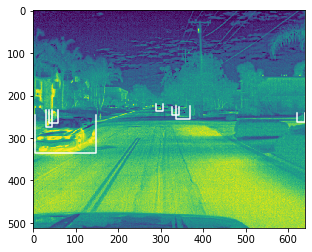

In [112]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

X = []
Y = []

for j in range(len(seg)):
    X.append([seg[j][i] for i in range(0,len(seg[j]),2)])
    Y.append([seg[j][i] for i in range(1,len(seg[j]),2)])
    
for x,y in zip(X,Y):
    plt.plot(x,y, color = "w")

img = mpimg.imread(dir + file_name + ".jpeg")
plt.imshow(img)



위 그림을 보아 annotation의 segmentation은 coco와 형식이 같다    
또한 file_name에는 확장자가 붙어있지 않으니 추가해 주는 것이 좋을 것이다.